In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-14 20:30:36.922967: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-14 20:30:36.923006: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load and Subset Data

<Item title:"SAC_Pond_Aquatic_Vegetation_Survey_RT" type:Feature Layer Collection owner:Anooshi>
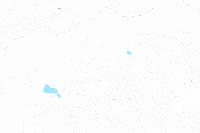

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('927950ee4b8348638a565d708709a173')

ponds = output['data0']
obs = output['table0']
feature_service = output['feature_service']

In [3]:
# Merge related table and feature layer
data = ponds.merge(obs, left_on='GlobalID', right_on='Ref_to_Ponds', how='inner')
data = data.drop(columns=['GlobalID_x','Ref_to_Ponds'])
data = data.rename(columns={'OBJECTID_x':'Pond_ObjectID','GlobalID_y':'Record_GlobalID', 'OBJECTID_y':'Record_ObjectID'})
data.head()

,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,EmerUpVeg,EmerFlVeg,SubVeg,NNIPSpecies,TotalEmerVeg,Species1,Species2,Species3,Species4,OtherSpecies,Comments,Record_GlobalID
0,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",5,2018-07-25 02:28:03,Roger Stephens,Russell Huddleston,None,"Sunny, clear, 83F",1,1,98,0,100,Creeping spike rush,Long-leaved pondweed,Fennel-leaved pondweed,Narrow-leaf cattail,Common water-nymph (Najas guadalupensis)(Subme...,NAJGUA approximately 8% of pond. Good visibili...,9aa80b2a-c913-42d8-80e3-6085c3b9a162
1,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",6,2019-07-25 22:52:53,Russell Huddleston,Rusty Hutto,None,"Partly cloudy, light wind, high 70s F",10,1,8,0,19,Creeping spike rush,Long-leaved pondweed,Fennel-leaved pondweed,Narrow-leaf cattail,Common water-nymph (Najas guadalupensis)(Subme...,Visibility is approximately 1.5 feet. Very hig...,a3ff01c6-848c-47f3-ae4d-4682ead38b91
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.0139993...",11,2021-07-29 20:16:02,Roger Stephens,None,None,"Partly cloudy, mid 80’s, wind 1-5 mph",0,0,0,0,0,None,None,None,None,None,"Pond completely dry, no aquatic vegetation pre...",c6e6a75d-e86a-4e90-8f90-a521e027fa91
3,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.4427477...",3,2018-07-25 00:17:33,Roger Stephens,Russell Huddleston,None,"Sunny, clear, 80F",1,5,25,0,31,Creeping spike rush,Long-leaved pondweed,Fennel-leaved pondweed,None,Gelatinous floating brown algae,Good depth visibility with low turbidity. Some...,4c06c3e0-3637-42c0-a188-7e5738e1ce05
4,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.4427477...",4,2019-07-25 23:53:45,Russell Huddleston,Rusty Hutto,None,"Partly cloudy, slight breeze, high 70s F",4,5,10,0,19,Creeping spike rush,Long-leaved pondweed,Fennel-leaved pondweed,None,Ceratophyllum demersum,Good visibility and low turbidity. Very little...,d2740699-28ce-4b18-9995-db8f23fc13a7


# QAQC

In [4]:
validate_domains(feature_service)



Table/Layer:  Observations


No Mismatches Found


Table/Layer:  Ponds


No Mismatches Found


In [5]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(data, objectID=['Record_ObjectID'])



Analysis for: Pond
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Additional_Surveyors
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Weather
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing wh

In [6]:
find_blank_entries(data, exclude_cols=['Additional_Surveyors','OtherSpecies','Species4'])

No blank Surveyor_1
No blank EmerUpVeg
No blank Weather
No blank Record_GlobalID
No blank Pond_ObjectID
No blank SHAPE
Blank Surveyor_2 entrie(s) exist!


,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,EmerUpVeg,EmerFlVeg,SubVeg,NNIPSpecies,TotalEmerVeg,Species1,Species2,Species3,Species4,OtherSpecies,Comments,Record_GlobalID
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",11,2021-07-29 20:16:02,Roger Stephens,None,None,"Partly cloudy, mid 80’s, wind 1-5 mph",0,0,0,0,0,None,None,None,None,None,"Pond completely dry, no aquatic vegetation present. Pond did not f...",c6e6a75d-e86a-4e90-8f90-a521e027fa91
5,2,Lower Courthouse Pond,SAC,50722.361328,975.616889,"{'rings': [[[6185350.87086464, 2036002.44274773], [6185350.5352353...",10,2021-07-29 17:43:41,Roger Stephens,None,None,"Partly cloudy, low 80’s, wind 1-2 mph",0,3,10,0,13,Fennel-leaved pondweed,Guadalupe water nymph,Cyanobacteria,None,Blue-green algae (Floating).,Pond water level and diversity very low. A few sub-adult bullfrogs...,ad461dde-13c3-435d-a288-c1d8468226da
8,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",9,2021-07-29 17:29:40,Roger Stephens,None,None,"Partly cloudy, low 80’s, wind 1-2 mph",0,0,0,0,0,None,None,None,None,None,Pond completely dry. No aquatic vegetation present. A ring of ELEM...,f8a68620-839f-467e-a3c9-db4c641e3d81


No blank Shape__Length
No blank Observation_Date
No blank TotalEmerVeg
No blank Record_ObjectID
No blank NNIPSpecies
Blank Species1 entrie(s) exist!


,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,EmerUpVeg,EmerFlVeg,SubVeg,NNIPSpecies,TotalEmerVeg,Species1,Species2,Species3,Species4,OtherSpecies,Comments,Record_GlobalID
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",11,2021-07-29 20:16:02,Roger Stephens,None,None,"Partly cloudy, mid 80’s, wind 1-5 mph",0,0,0,0,0,None,None,None,None,None,"Pond completely dry, no aquatic vegetation present. Pond did not f...",c6e6a75d-e86a-4e90-8f90-a521e027fa91
8,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",9,2021-07-29 17:29:40,Roger Stephens,None,None,"Partly cloudy, low 80’s, wind 1-2 mph",0,0,0,0,0,None,None,None,None,None,Pond completely dry. No aquatic vegetation present. A ring of ELEM...,f8a68620-839f-467e-a3c9-db4c641e3d81


Blank Species2 entrie(s) exist!


,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,EmerUpVeg,EmerFlVeg,SubVeg,NNIPSpecies,TotalEmerVeg,Species1,Species2,Species3,Species4,OtherSpecies,Comments,Record_GlobalID
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",11,2021-07-29 20:16:02,Roger Stephens,None,None,"Partly cloudy, mid 80’s, wind 1-5 mph",0,0,0,0,0,None,None,None,None,None,"Pond completely dry, no aquatic vegetation present. Pond did not f...",c6e6a75d-e86a-4e90-8f90-a521e027fa91
8,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",9,2021-07-29 17:29:40,Roger Stephens,None,None,"Partly cloudy, low 80’s, wind 1-2 mph",0,0,0,0,0,None,None,None,None,None,Pond completely dry. No aquatic vegetation present. A ring of ELEM...,f8a68620-839f-467e-a3c9-db4c641e3d81


No blank Pond
No blank BHR_Site
Blank Species3 entrie(s) exist!


,Pond_ObjectID,Pond,BHR_Site,Shape__Area,Shape__Length,SHAPE,Record_ObjectID,Observation_Date,Surveyor_1,Surveyor_2,Additional_Surveyors,Weather,EmerUpVeg,EmerFlVeg,SubVeg,NNIPSpecies,TotalEmerVeg,Species1,Species2,Species3,Species4,OtherSpecies,Comments,Record_GlobalID
2,1,East Pond,SAC,6833.884766,347.261376,"{'rings': [[[6187569.22043055, 2036958.01399931], [6187577.0015829...",11,2021-07-29 20:16:02,Roger Stephens,None,None,"Partly cloudy, mid 80’s, wind 1-5 mph",0,0,0,0,0,None,None,None,None,None,"Pond completely dry, no aquatic vegetation present. Pond did not f...",c6e6a75d-e86a-4e90-8f90-a521e027fa91
8,3,Upper Courthouse Pond,SAC,7318.915039,346.349601,"{'rings': [[[6185796.66656098, 2035879.24811223], [6185795.3778496...",9,2021-07-29 17:29:40,Roger Stephens,None,None,"Partly cloudy, low 80’s, wind 1-2 mph",0,0,0,0,0,None,None,None,None,None,Pond completely dry. No aquatic vegetation present. A ring of ELEM...,f8a68620-839f-467e-a3c9-db4c641e3d81


No blank Shape__Area
No blank SubVeg
No blank EmerFlVeg
No blank Comments


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


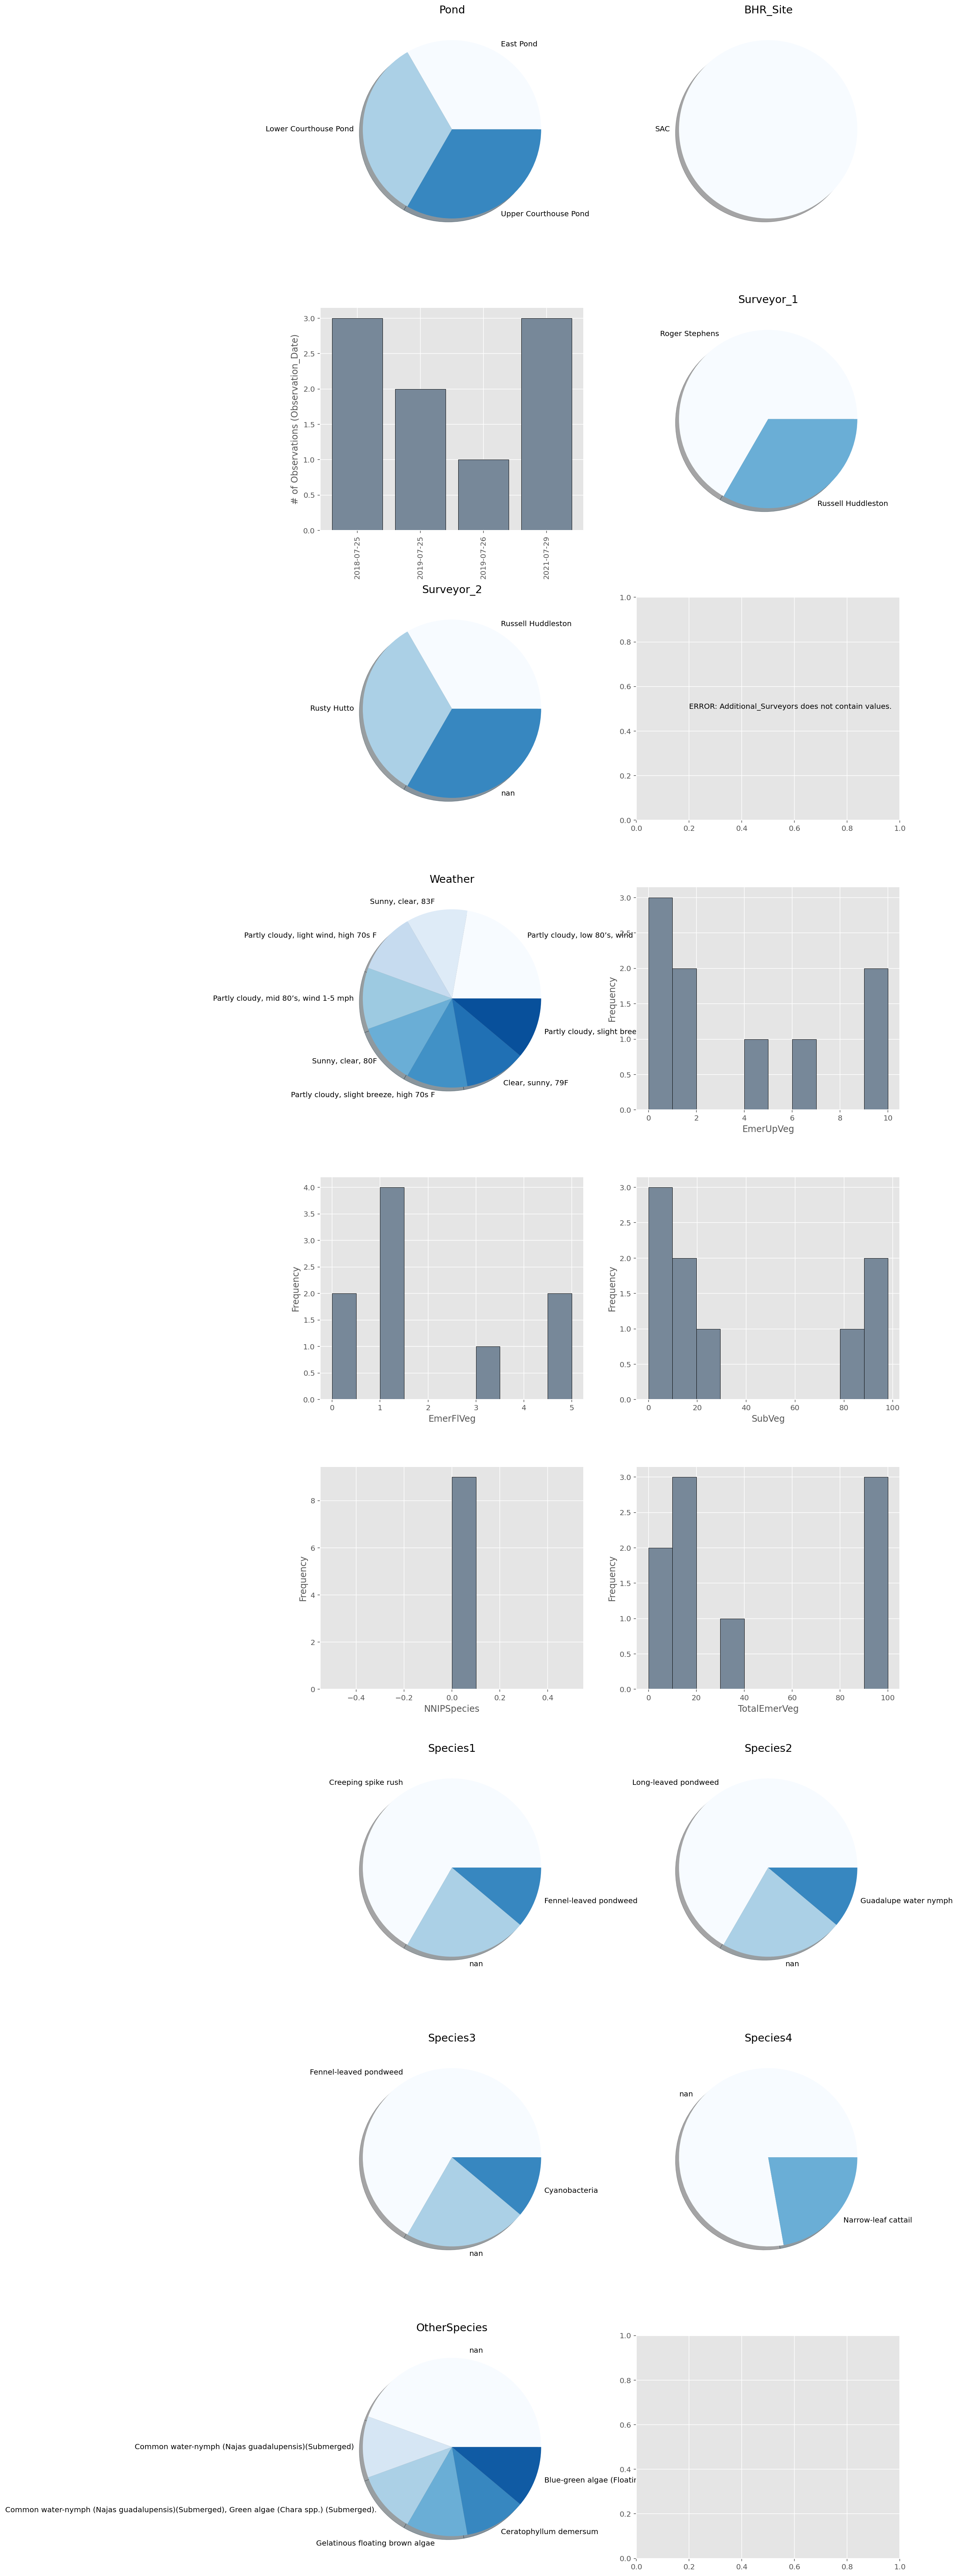

In [7]:
QAQC_plot(data,['Pond', 'BHR_Site', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Additional_Surveyors', 'Weather', 'EmerUpVeg',
       'EmerFlVeg', 'SubVeg', 'NNIPSpecies', 'TotalEmerVeg', 'Species1',
       'Species2', 'Species3', 'Species4', 'OtherSpecies'
       ])

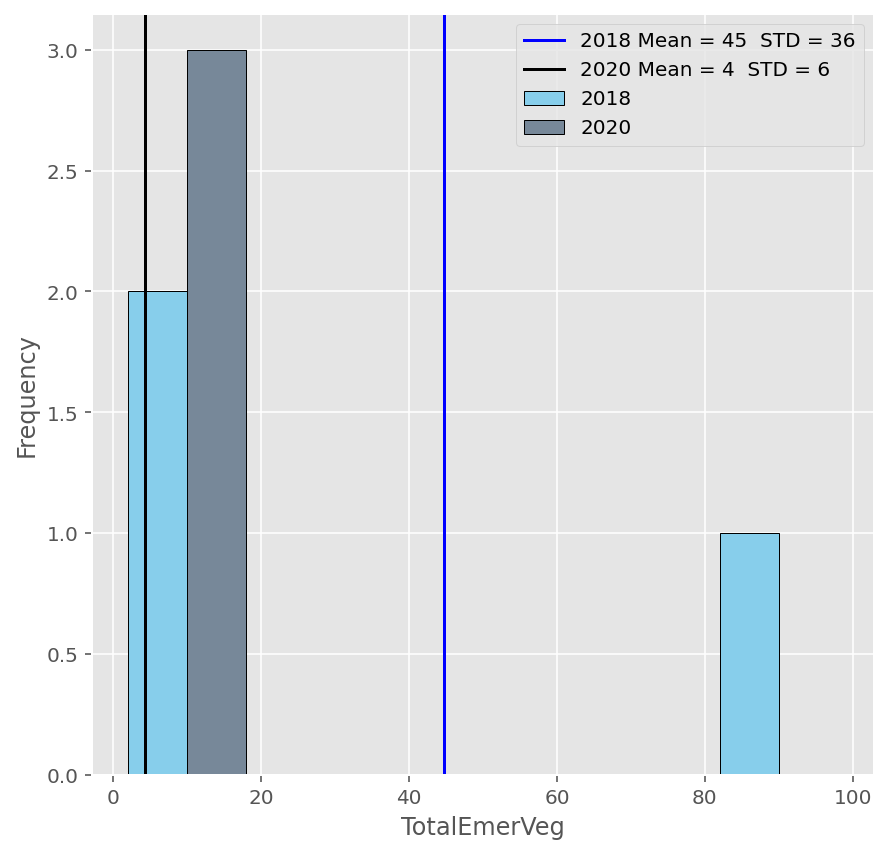

In [8]:
compare_years_continuous(data, 'TotalEmerVeg', '2018', '2020', 20)

In [9]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Ponds



No mislabeled photos found for layer/table Observations


# Export Excel Data Deliverable

In [10]:
data.columns

Index(['Pond_ObjectID', 'Pond', 'BHR_Site', 'Shape__Area', 'Shape__Length',
       'SHAPE', 'Record_ObjectID', 'Observation_Date', 'Surveyor_1',
       'Surveyor_2', 'Additional_Surveyors', 'Weather', 'EmerUpVeg',
       'EmerFlVeg', 'SubVeg', 'NNIPSpecies', 'TotalEmerVeg', 'Species1',
       'Species2', 'Species3', 'Species4', 'OtherSpecies', 'Comments',
       'Record_GlobalID'],
      dtype='object')

In [11]:
field_order = ['BHR_Site',
'Observation_Date',
'Surveyor_1',
'Surveyor_2', 
'Additional_Surveyors',
'Pond',
'Weather',
'EmerUpVeg',
'EmerFlVeg', 
'SubVeg',
'NNIPSpecies',
'TotalEmerVeg',
'Species1',
'Species2', 
'Species3', 
'Species4',
'OtherSpecies',
'Comments',
'Pond_ObjectID',
'Record_ObjectID',
'Record_GlobalID',
'Shape__Area', 
'Shape__Length',
 'SHAPE']

In [12]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Pond_Aquatic_Vegetation')

Exported to Outputs/SAC_Pond_Aquatic_Vegetation_Data_20211014.xlsx
